Name: Vitoria Tai

# KNN classifier

### Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)

In [414]:
#importing pandas because we are dealing with data frames 
import pandas as pd

In [415]:
#import seaborn and matplotlib for graphing heap maps and plots
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [416]:
#read data set 
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [417]:
#displaying the first 5 elements of the data set 
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [418]:
#displaying column names 
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [419]:
#dropping column 'Unnamed: 0' and changing the data set 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [420]:
#displaying the first 5 elements of the data set after the previous change
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [421]:
#importing StandardScaler to remove the mean and scaling to unit variance 
from sklearn.preprocessing import StandardScaler

In [422]:
#variable called scalar set to the function StandardScaler()
scalar = StandardScaler()

In [423]:
#compute the mean and std to be use for scaling
#drop'TARGET CLASS' column 
scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [424]:
#variable called scaled_features
#perform standardization by centering and scaling 
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))

In [425]:
#setting a data frame calles df_feature that has the scaled features 
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [426]:
#displaying the first 5 elements of the data set after dropping TARGET CLASS
#and scaling the data set 
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [427]:
#importing sklearn.model_selection to randomnize permutations to generate splits 
from sklearn.model_selection import train_test_split

In [428]:
#training test for x and y. Scale features and take the column 'TARGET CLASS' and test 30% of the data set
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [429]:
#importing KNeighborsClassifier 
from sklearn.neighbors import  KNeighborsClassifier

In [430]:
#variable knn 
#function KNeighborsClassifier with neighbor equal to 1
knn = KNeighborsClassifier(n_neighbors=1)

In [431]:
#fit the k-nearest neighbors classifier from the training data set 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [432]:
#predict the class labels for the provided data
predict = knn.predict(X_test)

In [433]:
#printing the predicted labels of X_test
predict

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [434]:
#importing classification_report, confusion matrix 
from sklearn.metrics import  classification_report, confusion_matrix

In [435]:
#printing the confusion matrix n x n
print(confusion_matrix(y_test,predict))

[[129  15]
 [ 14 142]]


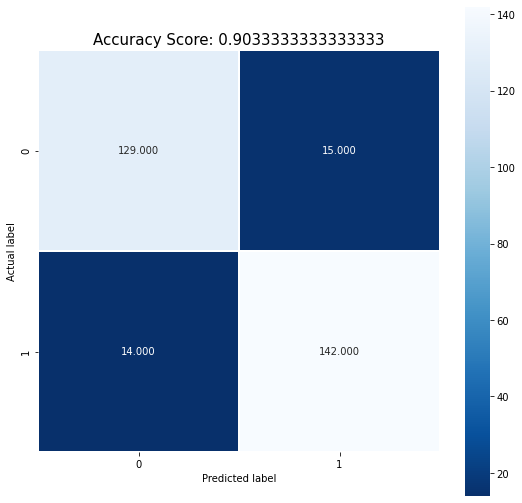

In [436]:
#printing the confusion matrix graph 
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [437]:
#recall = how many of this class you find over the whole number of element of this class  
#precision =  how many are correctly classified among that class 
#f1 score = is the weighted avg of precision and recall 
#support is the number of occurence of the given class in your dataset 
#accuracy is 0.92
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       144
           1       0.90      0.91      0.91       156

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Repeat above steps for K = 5, see what happens with Accuracy

In [438]:
#variable newValue
#function KNeighborsClassifier with neighbor equal to 1
newValue = KNeighborsClassifier(n_neighbors = 5)

In [439]:
#fit the k-nearest neighbors classifier from the training data set 
newValue.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [440]:
#predict the class labels for the provided data
predict2 = newValue.predict(X_test)

In [441]:
#printing the predicted labels of X_test
predict2

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

[[136   8]
 [ 11 145]]


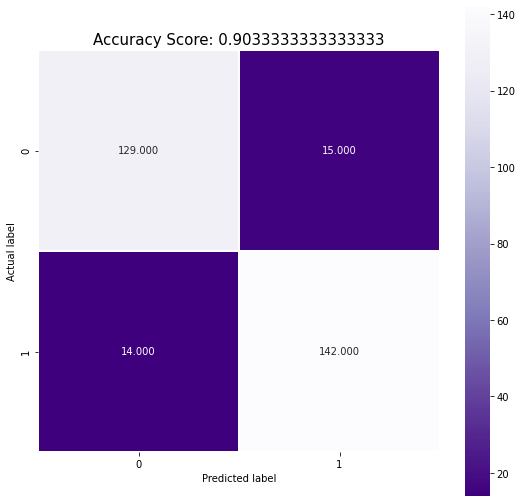

In [442]:
#printing rhe confusion matrix n x n
print(confusion_matrix(y_test, predict2))

#printing the confusion matrix graph 
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Purples_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [452]:
#recall = how many of this class you find over the whole number of element of this class 
#precision =  how many are correctly classified among that class 
#f1 score = is the weighted avg of precision and recall 
#support is the number of occurence of the given class in your dataset 
#accuracy for K = 5 is 0.95. More accurate than before 
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       144
           1       0.95      0.93      0.94       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [453]:
#importing metrics to calculate the accuracy with the value of k = 5
from sklearn import metrics
firstTrial = []
firstTrial.append(metrics.accuracy_score(y_test, predict2))
print(firstTrial)

[0.9366666666666666]


# K Value and Accuracy

In [444]:
#importing numpy 
import numpy as np

In [445]:
#importing metrics 
from sklearn import metrics

In [446]:
#variable for a list
score =[]

In [447]:
#Calculating the acuracy score (y_test vs y_pred)
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9033333333333333, 0.8866666666666667, 0.9366666666666666, 0.92, 0.9366666666666666, 0.9366666666666666, 0.9333333333333333, 0.9433333333333334, 0.9466666666666667, 0.95, 0.9533333333333334, 0.95, 0.96, 0.9466666666666667, 0.95, 0.9466666666666667, 0.9533333333333334, 0.95, 0.9533333333333334, 0.95, 0.96, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.95, 0.9633333333333334, 0.96, 0.9633333333333334, 0.9633333333333334, 0.9666666666666667, 0.9633333333333334, 0.96, 0.9633333333333334, 0.96, 0.9633333333333334, 0.96]


Text(0, 0.5, 'Testing Accuracy')

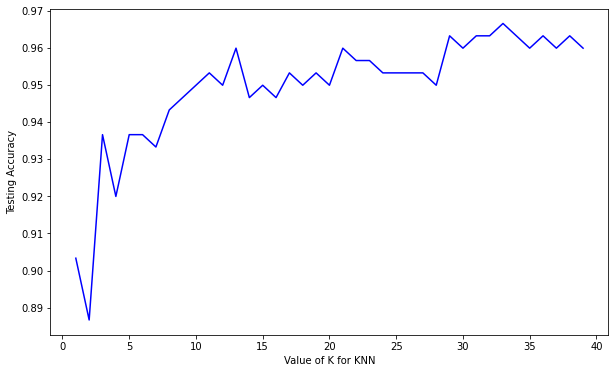

In [448]:
#plotting the value of k for knn vs testing accuracy on a graph
#as the value of k increases, the testing accuracy also increases
#which means the more neighbors a point has, the better accuracy we can get based on similarities 
plt.figure(figsize=(10,6))
plt.plot(range(1,40),score, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#Error Rate and K value

In [449]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

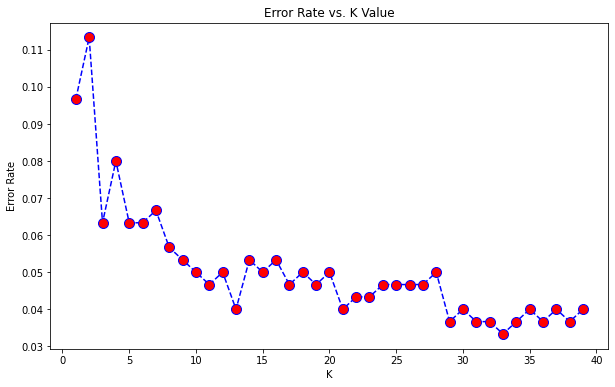

In [450]:
#ploting the k value vs error rate
#the larger the k the smaller the error rate because the larger the k, the better the accuracy 
#subsequntially avoiding errors
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Observations: 
K Value and Accuracy: (Based on the graph)
- The higher the k value, the better the accuracy.
- Since kNeighbors is based on classifying data on surrounding similarities, the more points surrounding a specific value, the better the accuracy.

Error Rate and K Value: (Based on the graph)
- Because the larger the k the better the accuracy, the error rate is smaller. 
- The smaller the error rate, the better the classification of the value is.


# Conclusion

1.  KNeighbors is an algorithm that stores all avalbale cases and classifies new cases based on similarity measure. The KNeighbors can be classified with the distance of one point to its k neighbors. 
2.  Predicting on K = 1, the accuracy percent is 90% based on this data set. Changing the K neighbors to a higher k number, makes the accuracy higher. I changed to k = 5 making the accuracy 94%
3. Normalized the data set by calling the function StandardScaler() since the values could be in a wide range. By standardizing the values, the objective functons can perform the analyzes more efficiently.  
